Based on [Bahy, Ramy M.](https://iopscience.iop.org/article/10.1088/1742-6596/1721/1/012058/meta)

Bahy, Ramy M. "Autofocus microscope system based on blur measurement approach." Journal of Physics: Conference Series. Vol. 1721. No. 1. IOP Publishing, 2021.

In [2]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
LIVE_PATH = os.path.join(os.getcwd(), 'images/database release')
LIVE_FILES = [x for x in os.listdir(LIVE_PATH) if x.endswith('.bmp')]

In [4]:
def get_blurness(img_ori):
    b_img_ver = cv2.filter2D(src=img_ori, ddepth=-1, kernel=np.ones((9, 1))/9)
    b_img_hor = cv2.filter2D(src=img_ori, ddepth=-1, kernel=np.ones((1, 9))/9)
    
    dimg_ver = np.abs(np.gradient(img_ori, axis=1))    
    dimg_hor = np.abs(np.gradient(img_ori, axis=0))
    dbimg_ver = np.abs(np.gradient(b_img_ver, axis=1))    
    dbimg_hor = np.abs(np.gradient(b_img_hor, axis=0))
    
    dver = np.abs(dimg_ver - dbimg_ver)
    dhor = np.abs(dimg_hor - dbimg_hor)
    
    blurness_ver = 1 - np.sum(dver) / np.sum(dimg_ver)
    blurness_hor = 1 - np.sum(dhor) / np.sum(dimg_hor)
    
    return blurness_ver, blurness_hor

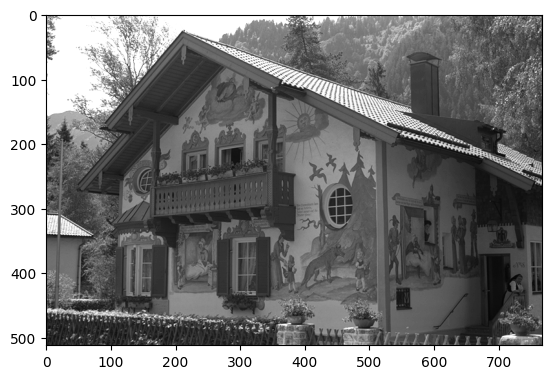

vertical: 0.36477997982554033, horizontal: 0.3201529228138946


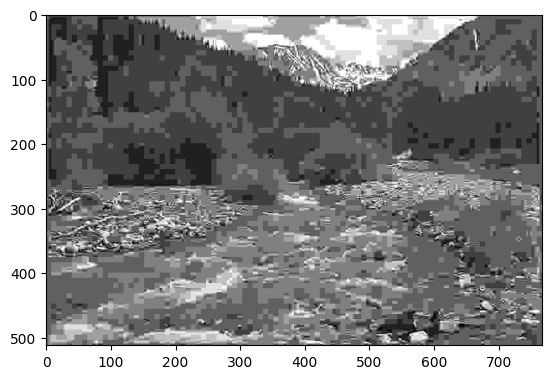

vertical: 0.34867628680189566, horizontal: 0.5275865228712586


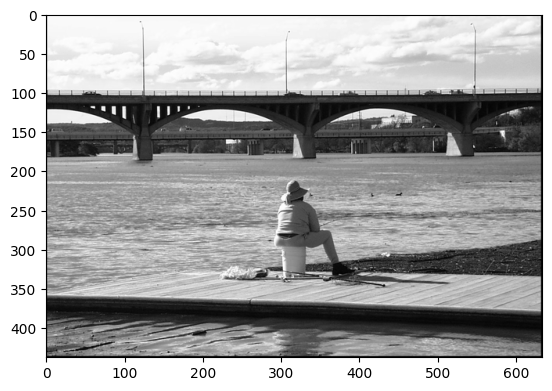

vertical: 0.38505090710136514, horizontal: 0.6911289169971773


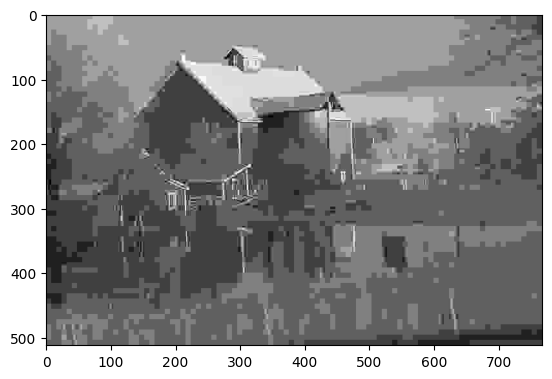

vertical: 0.5860455369481111, horizontal: 0.5575144187610523


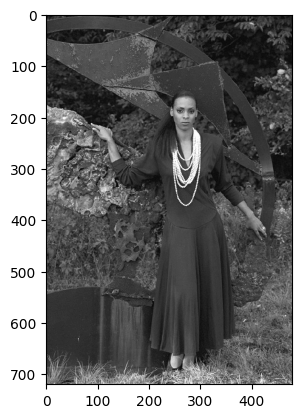

vertical: 0.3701998385397709, horizontal: 0.3324381735422417


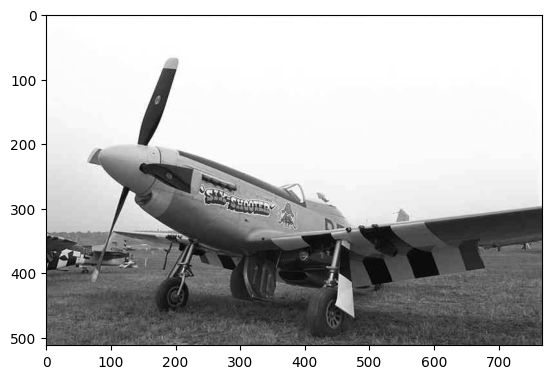

vertical: 0.4006798483075199, horizontal: 0.5282440339713055


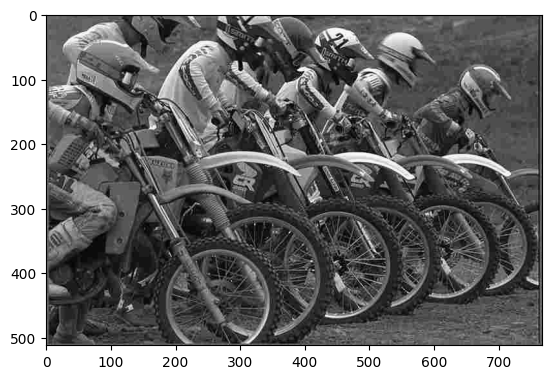

vertical: 0.3824949424995093, horizontal: 0.42497635326376637


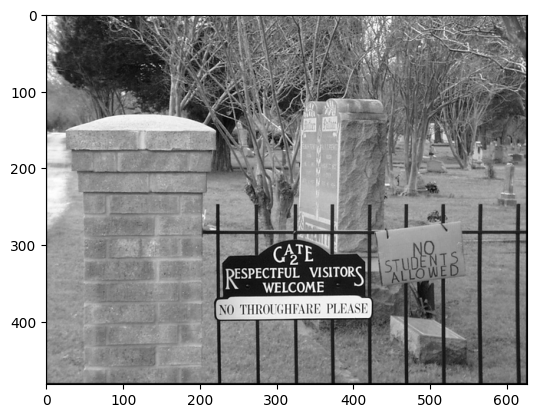

vertical: 0.48123052984695613, horizontal: 0.4348894100576344


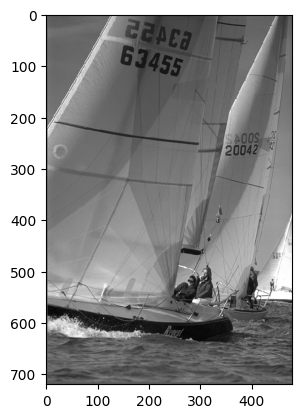

vertical: 0.3977713372013474, horizontal: 0.44560755357810944


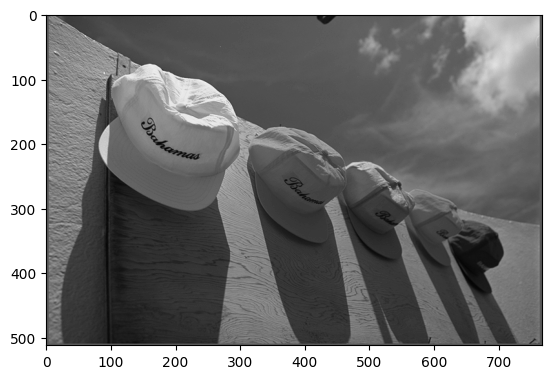

vertical: 0.3326188146606429, horizontal: 0.39583926365991906


In [5]:
for img_file in LIVE_FILES[:10]:
    img_path = os.path.join(LIVE_PATH, img_file)
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    plt.imshow(img_ori, cmap='gray')
    plt.show()
    blurness_ver, blurness_hor = get_blurness(img_ori)
    
    print(f'vertical: {blurness_ver}, horizontal: {blurness_hor}')
    
    # b_img_ver = cv2.filter2D(src=img_ori, ddepth=-1, kernel=np.ones((9, 1))/9)
    # blurness_ver, blurness_hor = get_blurness(b_img_ver)
    
    # print(f'vertical: {blurness_ver}, horizontal: {blurness_hor}')
    
    # b_img_hor = cv2.filter2D(src=img_ori, ddepth=-1, kernel=np.ones((1, 9))/9)
    # blurness_ver, blurness_hor = get_blurness(b_img_hor)
    
    # print(f'vertical: {blurness_ver}, horizontal: {blurness_hor}')

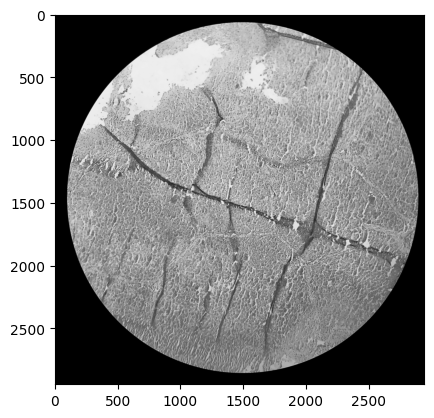

vertical: 0.4751292282415698, horizontal: 0.36420847547662993


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


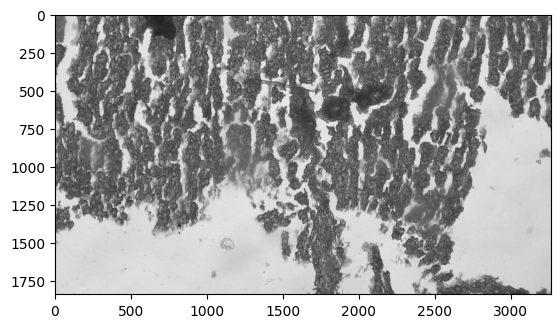

vertical: 0.6833696465467414, horizontal: 0.5626393571380257


In [7]:
TDG_PATH = os.path.join(os.getcwd(), 'tdg image samples')
TDG_FILES = [x for x in os.listdir(TDG_PATH) if x.lower().endswith('.jpg')]

for img_file in TDG_FILES[:10]:
    img_path = os.path.join(TDG_PATH, img_file)
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    plt.imshow(img_ori, cmap='gray')
    plt.show()
    blurness_ver, blurness_hor = get_blurness(img_ori)
    
    print(f'vertical: {blurness_ver}, horizontal: {blurness_hor}')
    